# Import Library

In [28]:
import os
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import splitfolders

# Import Dataset

In [29]:
base_dir = r'DATASET FIX'

# Split Data

In [41]:
splitfolders.ratio(
    base_dir,
    output='dataset_wayang',
    ratio=(.8,0.1, 0.1)
)

Copying files: 1000 files [00:07, 136.07 files/s]


In [30]:
train_dir = 'dataset_wayang/train/'
val_dir = 'dataset_wayang/val/'
val_dir = 'dataset_wayang/test/'
os.listdir(train_dir)

['abimanyu',
 'arjuna',
 'baladewa',
 'bima',
 'durna',
 'dursasana',
 'duryadana',
 'nakula',
 'sadewa',
 'yudistira']

# Augmentasi Data

In [31]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=0.45,
                    fill_mode='nearest', 
                    horizontal_flip=True
                    )
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(250,250), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=64,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical',
    #shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(250,250),
    batch_size=64,
    class_mode='categorical',
    #shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(250,250),
    batch_size=62,
    class_mode='categorical',
    # shuffle=True
)

Found 800 images belonging to 10 classes.
Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [33]:
image, label = train_generator.next()

In [34]:
class_name = os.listdir(train_dir)

In [35]:
class_name

['abimanyu',
 'arjuna',
 'baladewa',
 'bima',
 'durna',
 'dursasana',
 'duryadana',
 'nakula',
 'sadewa',
 'yudistira']

Ukuran gambar : (64, 250, 250, 3)


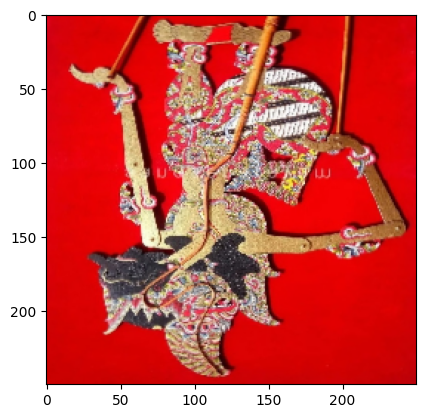

Ukuran gambar : (64, 250, 250, 3)


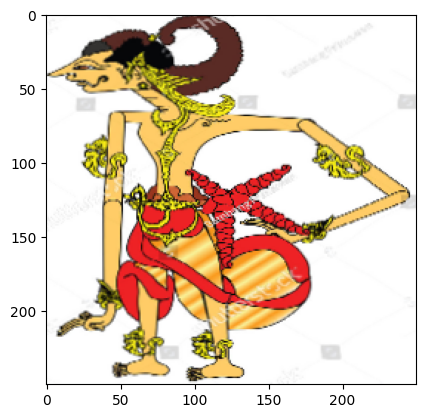

Ukuran gambar : (64, 250, 250, 3)


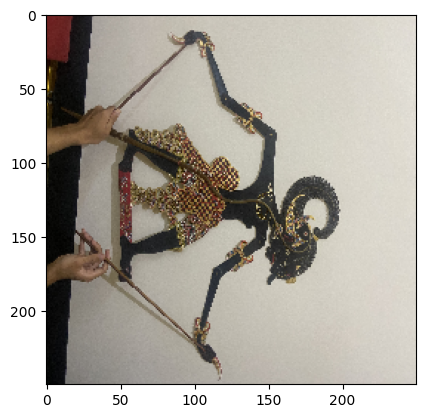

Ukuran gambar : (64, 250, 250, 3)


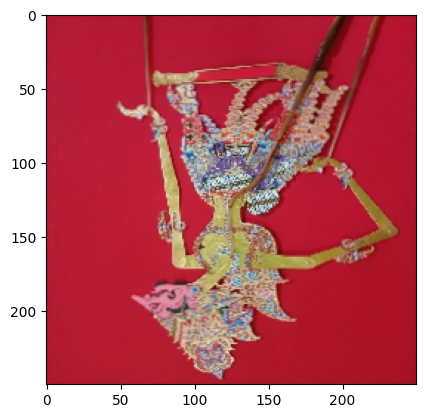

Ukuran gambar : (64, 250, 250, 3)


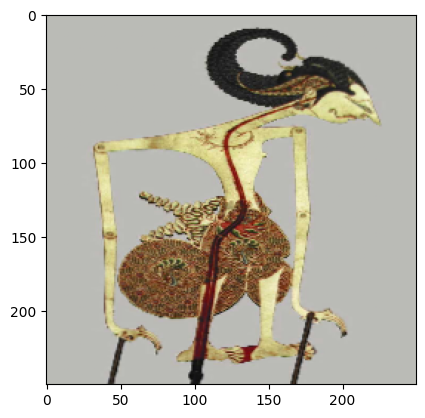

Ukuran gambar : (64, 250, 250, 3)


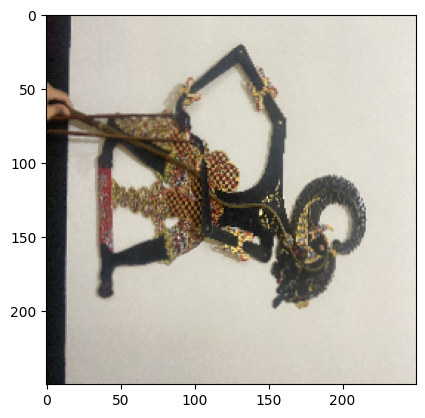

Ukuran gambar : (64, 250, 250, 3)


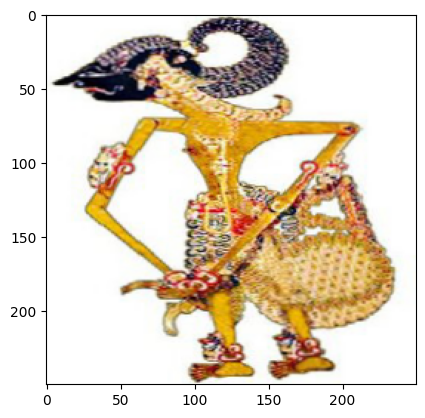

In [8]:
for i in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)   #  (32,150,150,3)
  plt.imshow(img[i])
  plt.show()

# Model CNN

Earlystopping

In [12]:
from keras.callbacks import EarlyStopping

monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=3)

In [14]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_accuracy',
#     patience= 2,
#     verbose= 1,
#     factor=0.3,
#     min_lr=0.000001
# )

In [15]:
# from tensorflow.keras.applications import InceptionV3
# model = InceptionV3(weights = 'imagenet',
#                     include_top=False,
#                     input_shape=(150,150,3))
# model.trainable = False

In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate

In [17]:
# add_model = Sequential()
# add_model.add(model)
# add_model.add(Flatten())
# add_model.add(Dense(1024, activation='relu'))
# add_model.add(Dropout(0.2))
# add_model.add(Dense(5, activation='softmax'))

In [38]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250,250,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 124, 124, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 29, 29, 64)       

In [28]:
from keras.metrics import Recall, Precision

In [29]:
# model = add_model

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Class Callback

In [31]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
                self.model.stop_training = True

In [32]:
callbacks = myCallback()

In [17]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    # callbacks=[callbacks]
)

Epoch 1/30
13/13 [==============================] - 70s 5s/step - loss: 2.3392 - accuracy: 0.1600 - val_loss: 1.9316 - val_accuracy: 0.3000
Epoch 2/30
13/13 [==============================] - 67s 5s/step - loss: 1.7401 - accuracy: 0.3562 - val_loss: 1.5077 - val_accuracy: 0.4600
Epoch 3/30
13/13 [==============================] - 80s 6s/step - loss: 1.3364 - accuracy: 0.5125 - val_loss: 1.2078 - val_accuracy: 0.5200
Epoch 4/30
13/13 [==============================] - 82s 6s/step - loss: 1.1162 - accuracy: 0.6237 - val_loss: 1.1652 - val_accuracy: 0.5700
Epoch 5/30
13/13 [==============================] - 67s 5s/step - loss: 0.8578 - accuracy: 0.7100 - val_loss: 1.1676 - val_accuracy: 0.5700
Epoch 6/30
13/13 [==============================] - 68s 5s/step - loss: 0.7609 - accuracy: 0.7287 - val_loss: 0.8076 - val_accuracy: 0.7000
Epoch 7/30
13/13 [==============================] - 71s 5s/step - loss: 0.5773 - accuracy: 0.8062 - val_loss: 0.8149 - val_accuracy: 0.7700
Epoch 8/30
13/13 [==

In [56]:
model.save('wayang2.h5')

c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Visualisasi Akurasi dan Loss

### Visualisai Akurasi Training dan Validation

In [39]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         'bD--',
         label='validation')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x1000 with 0 Axes>

### Visualisasi Loss Training dan Validation

In [40]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x1000 with 0 Axes>

#### Evaluasi Hasil

In [36]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/Relu' defined at (most recent call last):
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\traitlets\config\application.py", line 1046, in launch_instance
      app.start()
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ahmad\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ahmad\AppData\Local\Temp\ipykernel_5932\406525339.py", line 1, in <module>
      test_evaluate = model.evaluate(test_generator, verbose=0)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1850, in test_step
      y_pred = self(x, training=False)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\activations.py", line 321, in relu
      return backend.relu(
    File "c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential/dense/Relu'
Matrix size-incompatible: In[0]: [62,21632], In[1]: [6272,512]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_test_function_716]

#### Visualisasi hasil prediksi benar

In [12]:
import numpy as np

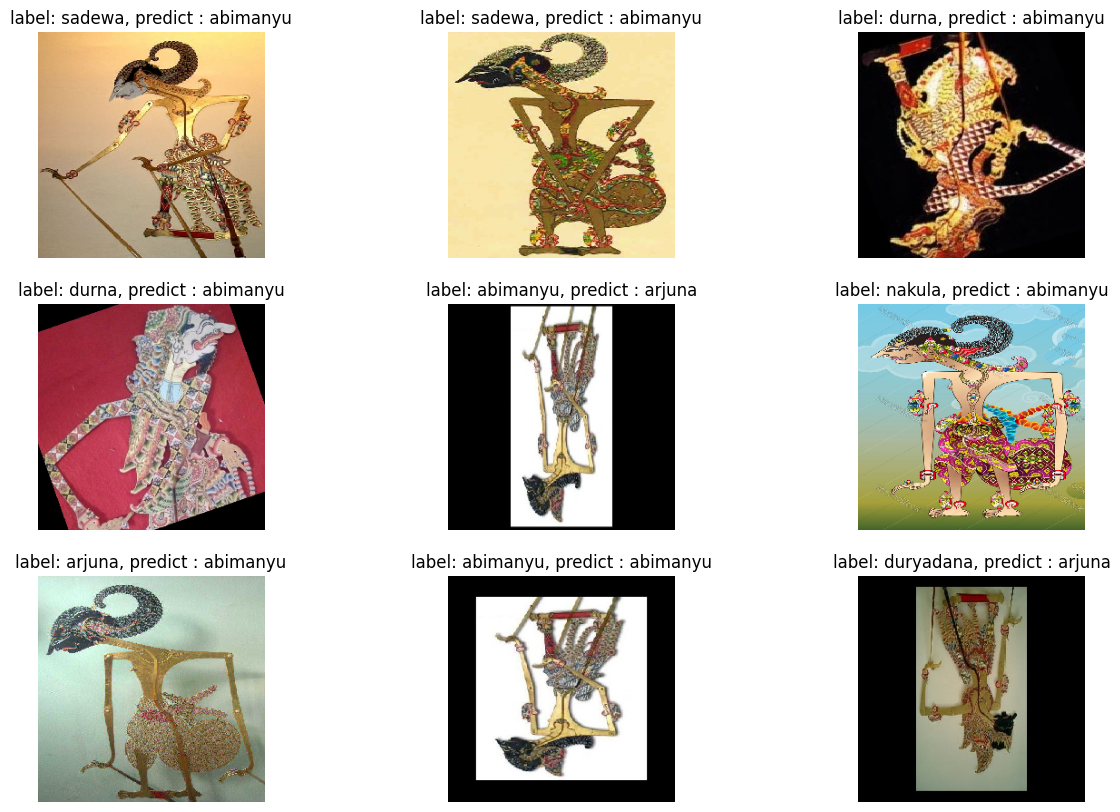

In [41]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

#### Hasil Prediksi salah

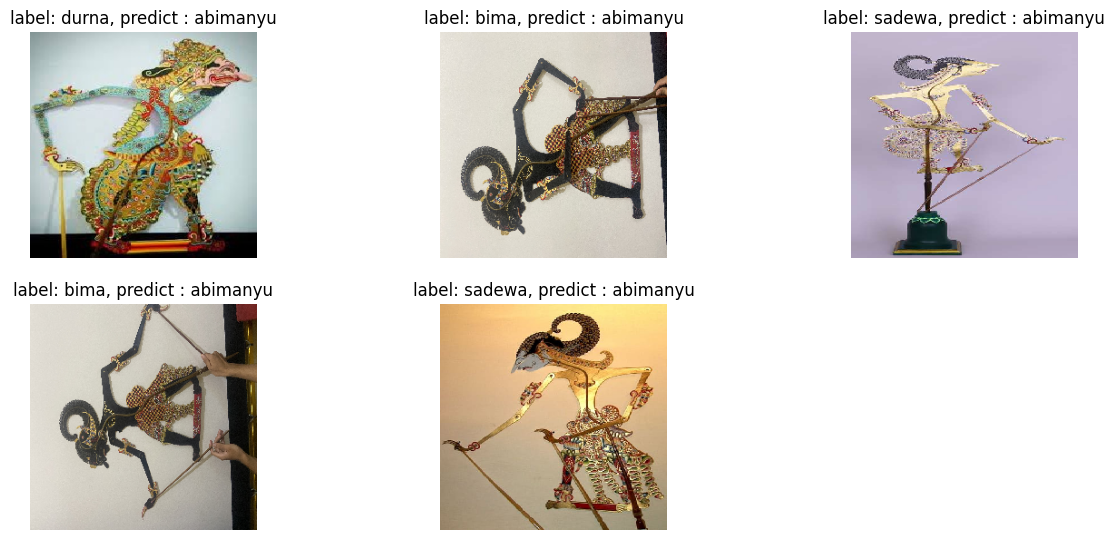

In [42]:
#Plot prediction Error
image ,label = next(iter(test_generator))
plt.figure(figsize=(15,10))
i,j = 0,0
while (j < 5):
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(3,3,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_name[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')
        j+=1
    i+=1

# Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
model = tf.keras.models.load_model('wayang.h5')

In [43]:
y_test = []
y_pred = []

for i in range(len(test_generator)) :
    x,y = test_generator.next()
    for j in range(len(y)) :
        y_test.append(class_name[tf.argmax(y[j])])
        y_pred.append(class_name[np.argmax(model.predict(x[j][None,...],verbose=0))])

In [44]:
class_name 

['abimanyu',
 'arjuna',
 'baladewa',
 'bima',
 'durna',
 'dursasana',
 'duryadana',
 'nakula',
 'sadewa',
 'yudistira']

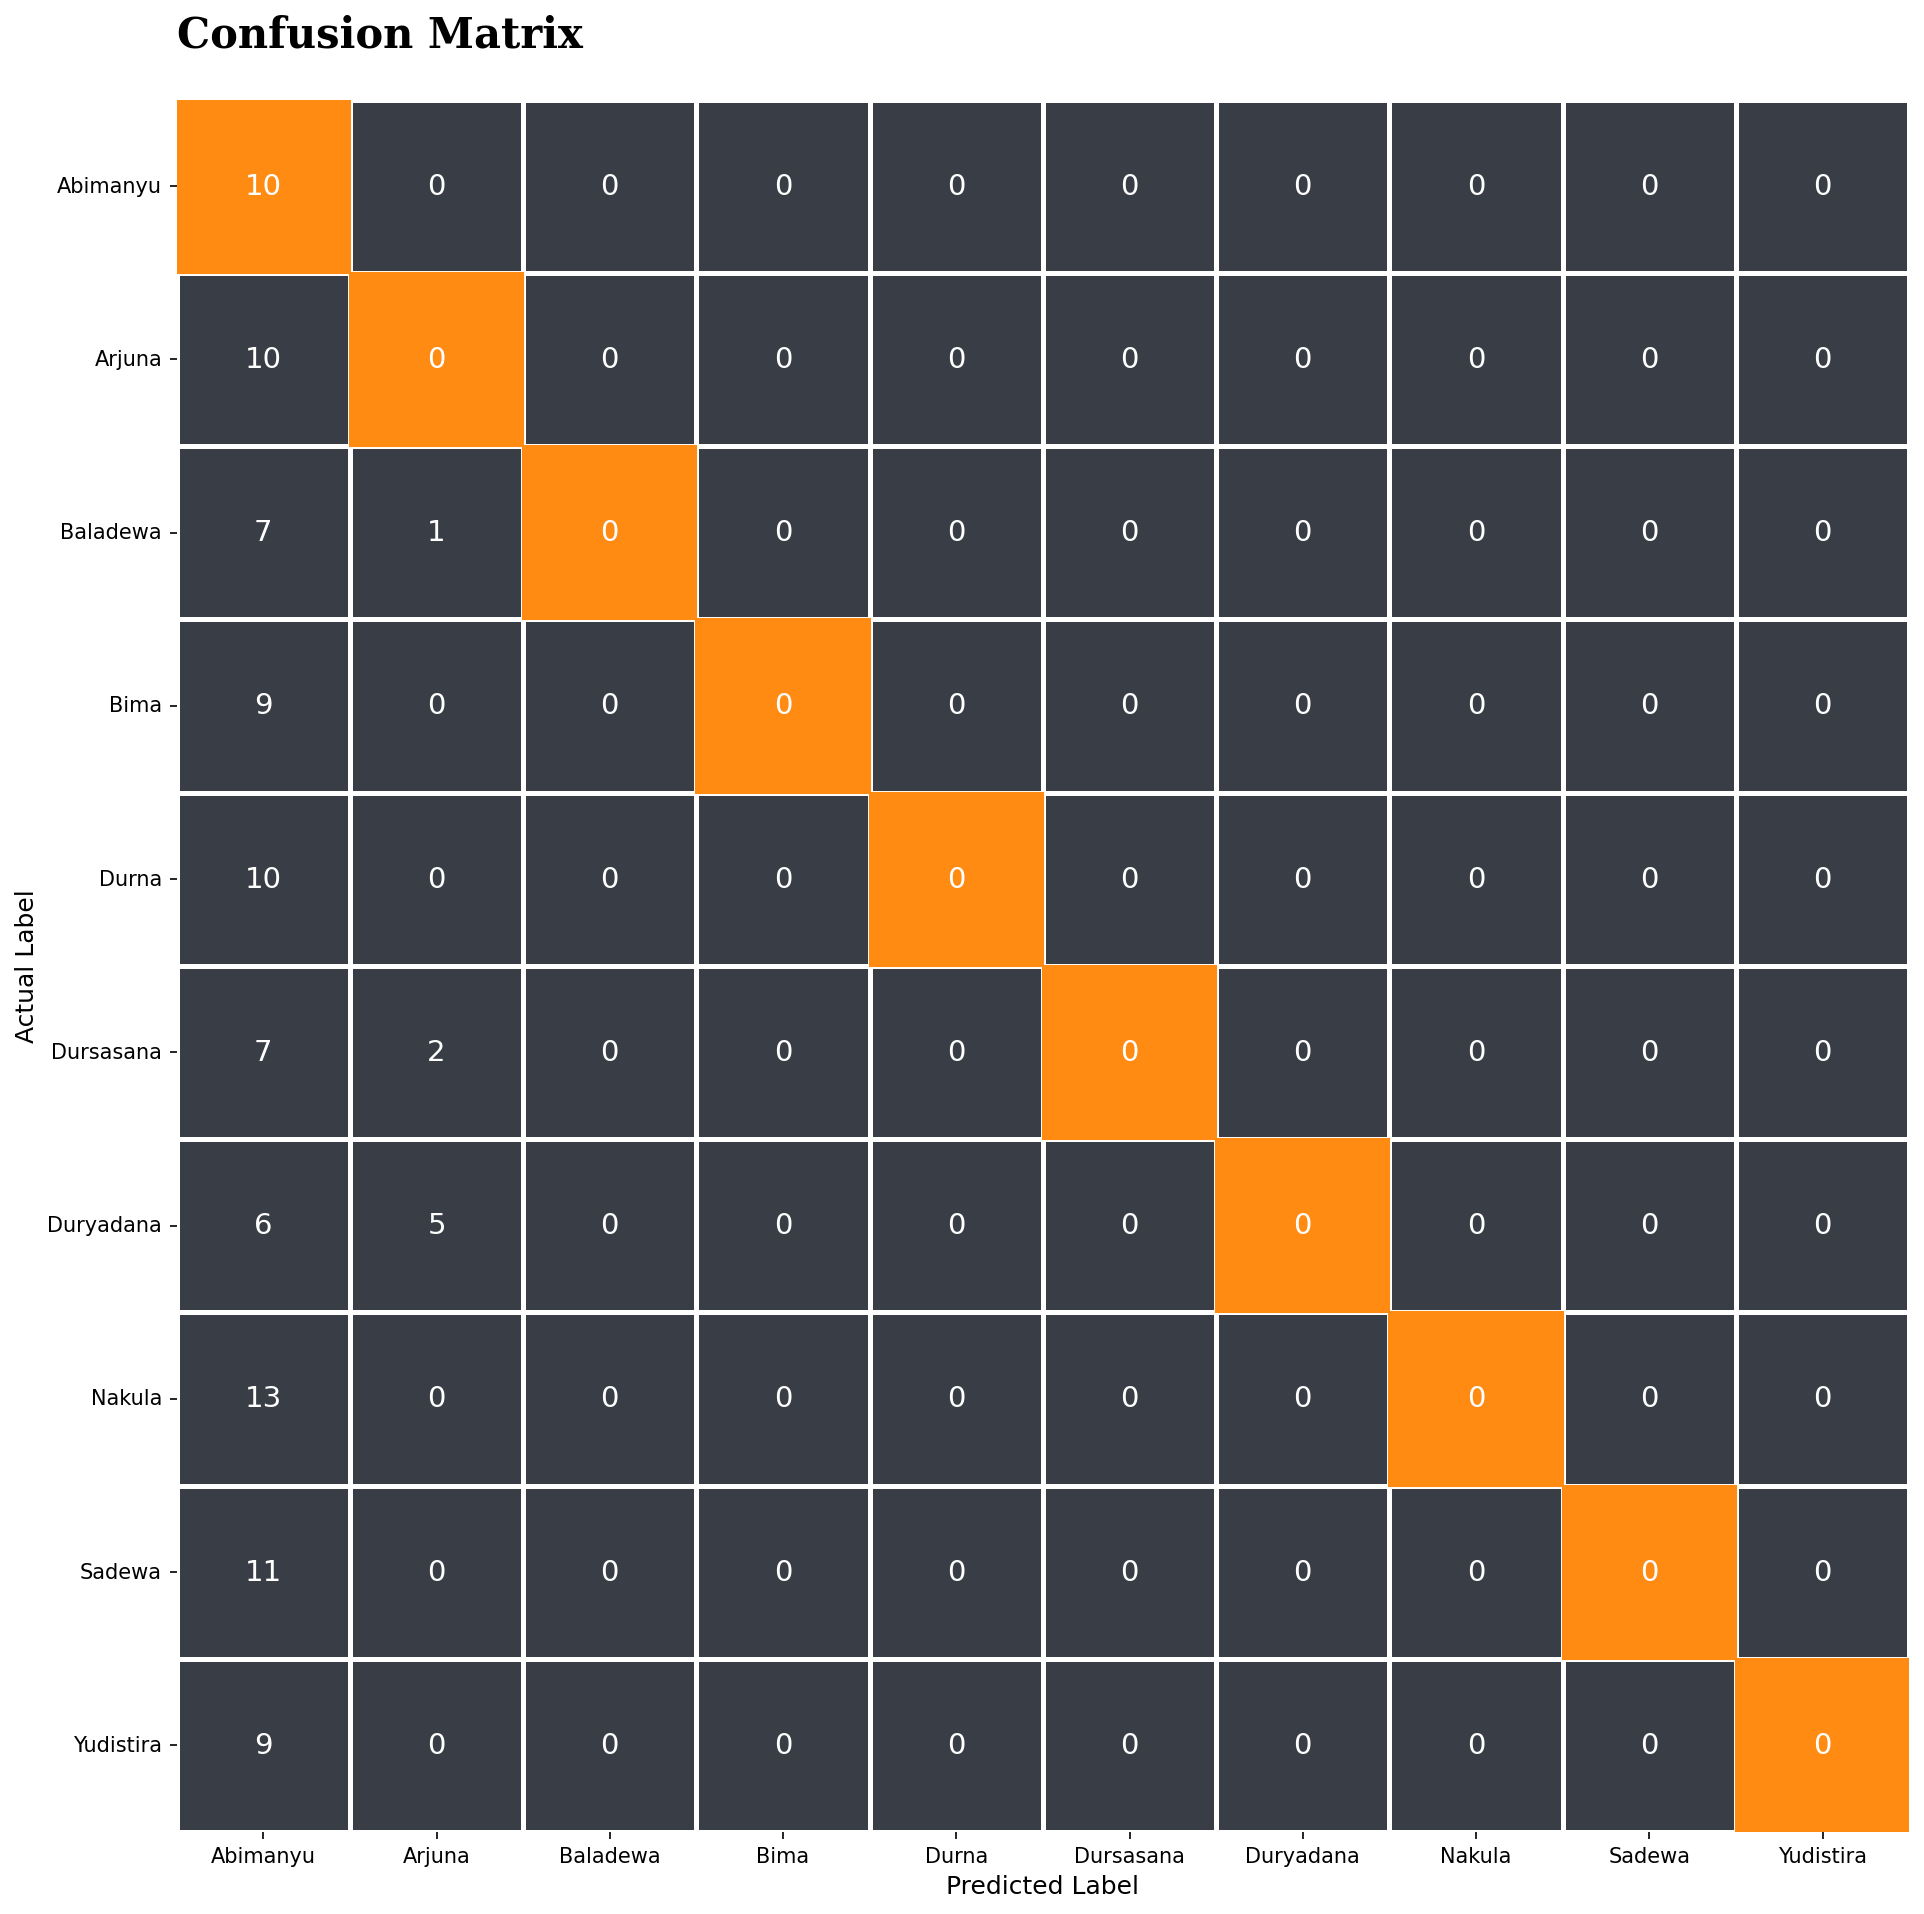

In [45]:
#Confusion Matrix
import matplotlib

fig, ax = plt.subplots(figsize=(20, 15),dpi=150)
cm = confusion_matrix(y_test, y_pred)

colors = ["#393E46","#393E46"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


ax.text(0,-0.3,'Confusion Matrix ',fontfamily='serif',fontsize=20,fontweight='bold')
sns.heatmap(ax=ax, data=cm,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=1.5, annot=True,cmap=colormap, 
            annot_kws={"fontsize":14},fmt='')
ax.set_xticklabels(['Abimanyu', 'Arjuna', 'Baladewa', 'Bima', 'Durna', 'Dursasana', 'Duryadana', 'Nakula', 'Sadewa', 'Yudistira'])
ax.set_yticklabels(['Abimanyu', 'Arjuna', 'Baladewa', 'Bima', 'Durna', 'Dursasana', 'Duryadana', 'Nakula', 'Sadewa', 'Yudistira'])
plt.yticks(rotation=0)

ax.set_ylabel("Actual Label",fontsize=12)
ax.set_xlabel("Predicted Label",fontsize=12)

from matplotlib.patches import Rectangle
for i in range(0,10):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=True,color="#FF8B13"))

plt.show()

### Classification Report

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [47]:
import pandas as pd

In [48]:
precission = precision_score(y_test, y_pred, pos_label='positive', average='micro')
recall = recall_score(y_test, y_pred, pos_label='positive', average='micro')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='micro')
accuracy = accuracy_score(y_test, y_pred)

c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [49]:
df_classification = pd.DataFrame(
    {
        "Accuracy"  : [accuracy],
        "Precision" : [precission],
        "Recall"    : [recall],
        "f1_score"  : [f1]
    },
    index = ["RGB"]
)

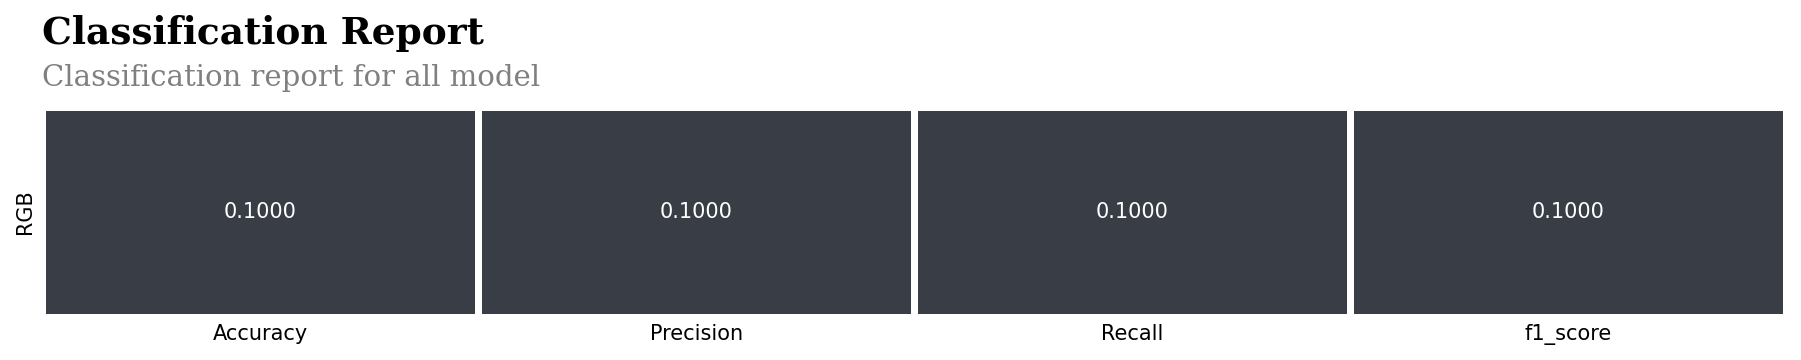

In [50]:
fig = plt.figure(figsize=(15,10), dpi=150)
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ["#393E46","#393E46"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(df_classification, cmap=colormap,annot=True,fmt=".4f", linewidths=2.5,cbar=False,ax=ax0)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(0,-0.30,'Classification Report',fontfamily='serif',fontsize=18,fontweight='bold')
ax0.text(0,-0.10,'Classification report for all model',fontfamily='serif',fontsize=14,fontweight='light',color='gray')


rect = ax0.add_patch(Rectangle((0, 1), 4, 1, fill=True,color="#FF8B13",lw=0,alpha=0.8))

plt.show()

#### Clasification Report

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred, target_names=class_name, digits=4))

              precision    recall  f1-score   support

    abimanyu     0.1087    1.0000    0.1961        10
      arjuna     0.0000    0.0000    0.0000        10
    baladewa     0.0000    0.0000    0.0000         8
        bima     0.0000    0.0000    0.0000         9
       durna     0.0000    0.0000    0.0000        10
   dursasana     0.0000    0.0000    0.0000         9
   duryadana     0.0000    0.0000    0.0000        11
      nakula     0.0000    0.0000    0.0000        13
      sadewa     0.0000    0.0000    0.0000        11
   yudistira     0.0000    0.0000    0.0000         9

    accuracy                         0.1000       100
   macro avg     0.0109    0.1000    0.0196       100
weighted avg     0.0109    0.1000    0.0196       100



c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmad\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Import File

In [53]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

1/1 [==============================] - 0s 50ms/step
C:/Users/ahmad/OneDrive/Dokumen/DATASET SKRIPSI/DATASET BARU/bima.jpg
Yudistira


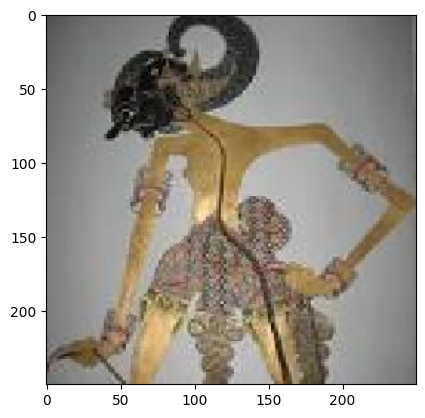

In [54]:
filename = askopenfilename()
img = tf.keras.utils.load_img(filename, target_size=(250, 250))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('Abimanyu')
elif classes[0][1] == 1:
  print('Arjuna')
elif classes[0][2] == 1:
  print('Baladewa')
elif classes[0][3] == 1:
  print('Bima')
elif classes[0][4] == 1:
  print('Durna')
elif classes[0][5] == 1:
  print('Dursasana')
elif classes[0][6] == 1:
  print('Duryadana')
elif classes[0][7] == 1:
  print('Nakula')
elif classes[0][8] == 1:
  print('Sadewa')
else:
  print('Yudistira')